# Auto-sklearn classifier on real dataset

In [2]:
!sudo apt-get install build-essential swig
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 0s (3,821 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fron


***Note:-***
Need to '*Restart runtime*' before proceed to next statement. 

In [1]:
# print autosklearn version
import autosklearn
print('autosklearn: %s' % autosklearn.__version__)

autosklearn: 0.14.7


Further information about installation in: https://automl.github.io/auto-sklearn/master/installation.html

In [2]:
from autosklearn.classification import AutoSklearnClassifier

In [3]:
from sklearn.model_selection import train_test_split

 
##Datasource: 
We use the hand gestures dataset comprising 6000 datapoints having electromyographic measurement of hand muscles when forming rock (0) or paper (2)

https://www.kaggle.com/kyr7plus/emg-4


## Classification

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
!wget 'https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/0.csv'
!wget 'https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/2.csv'

--2022-09-08 07:10:42--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/0.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 927477 (906K) [text/plain]
Saving to: ‘0.csv’

0.csv               100%[===================>] 905.74K  --.-KB/s    in 0.05s   

2022-09-08 07:10:43 (19.5 MB/s) - ‘0.csv’ saved [927477/927477]

--2022-09-08 07:10:43--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 926607 (905K) [text/plain]
Saving t

In [6]:
text_0=pd.read_csv('/content/0.csv', header=None)
text_2=pd.read_csv('/content/2.csv', header=None)

In [7]:
text_0.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [8]:
text_2.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,4.0,19.0,-9.0,-7.0,-3.0,-36.0,-6.0,-23.0,3.0,-21.0,...,9.0,-14.0,-2.0,-3.0,-4.0,-21.0,7.0,-8.0,-12.0,2
1,-1.0,12.0,20.0,7.0,20.0,-73.0,-4.0,-2.0,4.0,5.0,...,-3.0,-5.0,-2.0,0.0,-4.0,-7.0,5.0,6.0,9.0,2
2,4.0,5.0,-8.0,-2.0,10.0,-10.0,-10.0,16.0,-3.0,-18.0,...,2.0,0.0,2.0,3.0,-8.0,19.0,20.0,0.0,-8.0,2
3,-3.0,-3.0,5.0,11.0,25.0,-20.0,-2.0,14.0,9.0,32.0,...,15.0,-2.0,16.0,6.0,9.0,1.0,31.0,16.0,4.0,2
4,-5.0,-9.0,-2.0,-5.0,-46.0,-34.0,-9.0,-4.0,0.0,8.0,...,-5.0,-11.0,-6.0,7.0,6.0,-10.0,-24.0,-6.0,0.0,2


In [9]:
text_0.shape, text_2.shape

((2910, 65), (2943, 65))

In [10]:
text_0.iloc[:,-1].value_counts()==2910, text_2.iloc[:,-1].value_counts()==2943

(0    True
 Name: 64, dtype: bool, 2    True
 Name: 64, dtype: bool)

In [11]:
print('Number of null values in text_0: ',text_0.isna().sum().sum()),
print('Number of null values in text_2: ',text_2.isna().sum().sum())

Number of null values in text_0:  0
Number of null values in text_2:  0


In [12]:
allFiles=['/content/0.csv','/content/2.csv']

list = []
for file in allFiles:
    read = pd.read_csv(file, header = None)
    list.append(read)
df = pd.concat(list)

In [13]:
df.shape

(5853, 65)

Text(0, 0.5, 'Count')

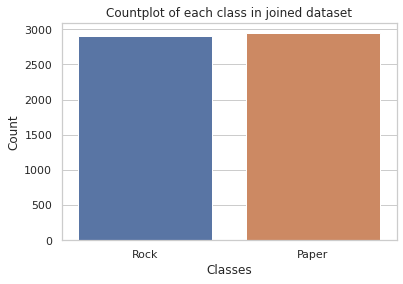

In [14]:
sns.set(style='whitegrid')
df_copy=df.copy(deep=True)
df_copy.loc[:,64]=(df_copy.loc[:,64]).replace(0,'Rock').replace(2,'Paper')
sns.countplot(x=64,data=df_copy)
plt.title('Countplot of each class in joined dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

In [15]:
def read_data():
    list = []
    for file in allFiles:
        read = pd.read_csv(file, header = None)
        list.append(read)
    df = pd.concat(list)
    X = df.iloc[:, :-1].values
    Y = df.iloc[:, -1].values
    from sklearn.model_selection import train_test_split
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.15)
    return Xtrain, Xtest, Ytrain, Ytest

In [16]:
X_train, X_test, y_train, y_test = read_data()

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4975, 64), (878, 64), (4975,), (878,))

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

In [19]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [20]:
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

We will first classify the dataset using SVC - optimal values for hyperparameters are determined using gridsearch

In [21]:
from sklearn.svm import SVC

In [22]:
svc= SVC(kernel='rbf',C=15,gamma=0.01,decision_function_shape='ovr',probability=True)
svc.fit(X_train_scaled,y_train)
y_pred_svm=svc.predict(X_test_scaled)

In [23]:
y_pred_svm=svc.predict(X_test_scaled).T

In [24]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       438
           2       0.96      0.98      0.97       440

    accuracy                           0.97       878
   macro avg       0.97      0.97      0.97       878
weighted avg       0.97      0.97      0.97       878



In [25]:
acc = accuracy_score(y_test, y_pred_svm)
print("Accuracy: %.3f" % acc)

Accuracy: 0.968


The accuracy is really good. We will try auto-sklearn classifier to check if the accuracy is further improved

### Classification with Autosklearn:

Function parameters

- time_left_for_this_task: Corresponds to the time in seconds the process will run
- per_run_time_limit: Limit of time in seconds to evaluate the performance of each model, thus if a model takes more time to run it will fail and the process will continue evaluating others.
- n_jobs: Number of cores to use

Hyper-parameter tuning is done concurrently for each model 

In [26]:
model_auto = AutoSklearnClassifier(time_left_for_this_task=4*60, 
                                   per_run_time_limit=30, 
                                   n_jobs=-1)
model_auto.fit(X_train_scaled,y_train)
print(model_auto.sprint_statistics())

y_hat = model_auto.predict(X_test_scaled)
acc = accuracy_score(y_test, y_hat)
print("Accuracy: %.3f" % acc)

auto-sklearn results:
  Dataset name: 74908090-2f44-11ed-8198-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.993910
  Number of target algorithm runs: 33
  Number of successful target algorithm runs: 25
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 7
  Number of target algorithms that exceeded the memory limit: 1

Accuracy: 0.987


In [27]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       438
           2       0.99      0.99      0.99       440

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878



As you observe the accuracy is bit more improved as compared to SVC. The classifer tested 26 algorithms and created an ensemble of the top-ranking algorithms

In [28]:
model_auto.show_models()

{28: {'model_id': 28,
  'rank': 1,
  'cost': 0.006090133982947665,
  'ensemble_weight': 0.36,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7fc34d80d9d0>,
  'balancing': Balancing(random_state=1),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7fc34d9335d0>,
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7fc34df13310>,
  'sklearn_classifier': HistGradientBoostingClassifier(early_stopping=True,
                                 l2_regularization=1.1246927657557262e-05,
                                 learning_rate=0.23928822052099652, max_iter=128,
                                 max_leaf_nodes=12, min_samples_leaf=147,
                                 n_iter_no_change=14, random_state=1,
                                 validation_fraction=0.18959231467195137,
                                 warm_start=True)},
 17: {'model_id